In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

bs = 8


In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/data/Cat_Classifier

/content/drive/My Drive/data/Cat_Classifier


In [6]:
labels=[
    "Abyssinian cat",
    "Aegean cat",
    "Balinese cat",
    "Oregon Rex cat",
    "Oriental Bicolor cat",
    "Persian cat",
    "Pixie-Bob cat",
    "Ragamuffin cat",
    "Siberian cat",
    "Siamese cat",
    "Turkish Angora cat",
    "Bengal cat",
    "British Longhair cat",
    "Bombay cat",
    "Birman cat",
    "Burmese cat",
    "Burmilla cat",
    "Cornish Rex cat",
    "Cymric cat",
    "Donskoy cat"
]

In [7]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)



In [8]:
for cat_type in labels:
    dest = f"{data_path}/{cat_type}"
    if not os.path.exists(dest):
      os.mkdir(dest)

    try:
      cat_image_urls =search_images_ddg(cat_type)
      download_images(dest,urls=cat_image_urls)
    except:
     continue



In [9]:
count=get_image_files(data_path)
count

(#3888) [Path('data/Abyssinian cat/7012e6ae-c00f-4e49-baf2-68e1357dcea1.jpg'),Path('data/Abyssinian cat/ac22bbcc-0f34-4b5f-a70e-b47ef88185c7.jpg'),Path('data/Abyssinian cat/854f99f2-b7c6-41fa-83b7-6625c6966b44.png'),Path('data/Abyssinian cat/a8065003-3765-44af-ab15-cd68259fc1a1.jpg'),Path('data/Abyssinian cat/14416560-c90f-4df0-8eb2-72f1d84fdae4.jpg'),Path('data/Abyssinian cat/00f9a180-fd29-4e78-8775-ce719861f6e9.jpg'),Path('data/Abyssinian cat/ad3e4e51-966c-4aa7-ac50-8adbceaa8abb.jpg'),Path('data/Abyssinian cat/13529439-e679-4ecf-85b4-e1a92968cf7f.jpg'),Path('data/Abyssinian cat/fbde33e9-ef9e-488c-9d0f-e98ab861696a.jpg'),Path('data/Abyssinian cat/d71f620f-133e-497f-9cb5-73e5773c6f1c.jpg')...]

In [10]:
fail=verify_images(count)
fail

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#114) [Path('data/Abyssinian cat/e9c47eaa-6e80-4930-8652-eb1ffb068bc1.jpg'),Path('data/Abyssinian cat/af2287d9-06c4-4907-8284-368a5e22e824.jpeg'),Path('data/Abyssinian cat/88f4a215-4122-4e8e-b2f5-55e7d3ff21c1.jpg'),Path('data/Abyssinian cat/37408aa2-cdb3-4d11-9c6c-9cfc4e8592a1.jpg'),Path('data/Aegean cat/ab74a82d-5bae-4bee-a086-68d4ef78f3cb.jpg'),Path('data/Aegean cat/cd40dd8c-af7c-4e8c-9b33-1b3119f65d37.jpg'),Path('data/Aegean cat/12bae9a0-afce-4931-b7b4-98260b8ab6a4.jpg'),Path('data/Aegean cat/c2b9bcdc-2988-42dc-95d8-cae154f404d3.jpg'),Path('data/Balinese cat/2d7f835e-6f19-4918-ae74-b4680ea0a36f.png'),Path('data/Balinese cat/e95e5d9f-3ee2-4269-8dc5-5f17639d4be2.jpg')...]

In [11]:
fail.map(Path.unlink)

(#114) [None,None,None,None,None,None,None,None,None,None...]

In [12]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = RandomSplitter(valid_pct=0.1,seed=42),
                   item_tfms = Resize(128))

In [13]:
dls=dblock.dataloaders(data_path,bs=bs)

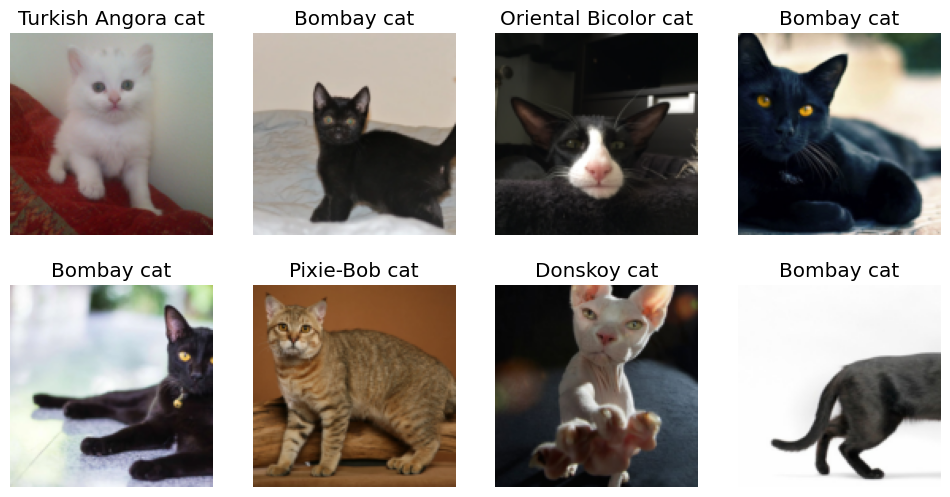

In [14]:
dls.train.show_batch(max_n=8,nrows=2)

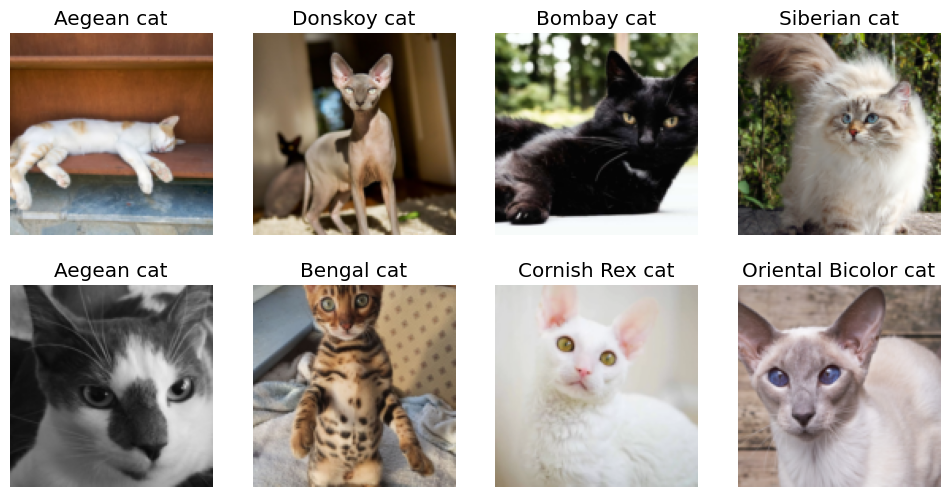

In [15]:
dls.valid.show_batch(max_n=8,nrows=2)

In [18]:
torch.save(dls,"cat_dataloader_v0.pkl")